# Fama French Regression Model

In [3]:
import pandas as pd
import datetime as dt
import statsmodels.api as sm
import yfinance as yf
import plotly.offline as pyo
import plotly.express as px
import numpy as np

pyo.init_notebook_mode(connected=True)
pd.options.plotting.backend = 'plotly'

In [4]:
df = yf.download('FDGRX', start='2015-01-01', end='2025-12-31')
df

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,FDGRX,FDGRX,FDGRX,FDGRX,FDGRX
Date,,,,,
2015-01-02,3.295303,3.295303,3.295303,3.295303,0
2015-01-05,3.247788,3.247788,3.247788,3.247788,0
2015-01-06,3.208275,3.208275,3.208275,3.208275,0
2015-01-07,3.260291,3.260291,3.260291,3.260291,0
2015-01-08,3.318560,3.318560,3.318560,3.318560,0
...,...,...,...,...,...
2025-12-23,46.097328,46.097328,46.097328,46.097328,0
2025-12-24,46.188000,46.188000,46.188000,46.188000,0


In [5]:
log_returns = np.log(df.Close / df.Close.shift(1)).dropna()
log_returns*100

Ticker,FDGRX
Date,
2015-01-05,-1.452395
2015-01-06,-1.224063
2015-01-07,1.608312
2015-01-08,1.771443
2015-01-09,-0.574358
...,...
2025-12-23,0.671007
2025-12-24,0.196503
2025-12-26,5.131493


In [6]:
daily_cum_returns = np.exp(log_returns.cumsum()) - 1
daily_cum_returns

Ticker,FDGRX
Date,
2015-01-05,-0.014419
2015-01-06,-0.026410
2015-01-07,-0.010625
2015-01-08,0.007058
2015-01-09,0.001290
...,...
2025-12-23,12.988800
2025-12-24,13.016315
2025-12-26,13.754335


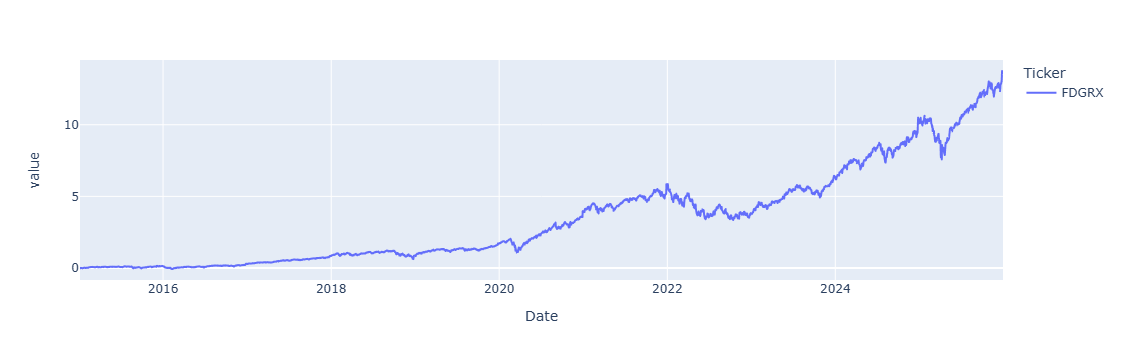

In [7]:
daily_cum_returns.plot()

In [8]:
monthly_cum_returns =  np.exp(log_returns.resample('M').sum()) - 1 
monthly_cum_returns

Ticker,FDGRX
Date,
2015-01-31,-0.002431
2015-02-28,0.068234
2015-03-31,-0.013432
2015-04-30,0.001521
2015-05-31,0.025020
...,...
2025-08-31,0.014068
2025-09-30,0.070709
2025-10-31,0.055799


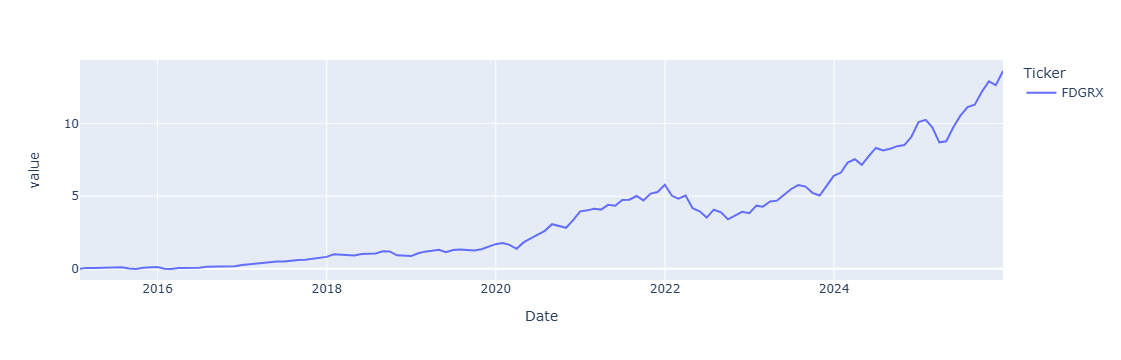

In [9]:
monthly_cum_return_series = (1 + monthly_cum_returns).cumprod() - 1
monthly_cum_return_series.plot()

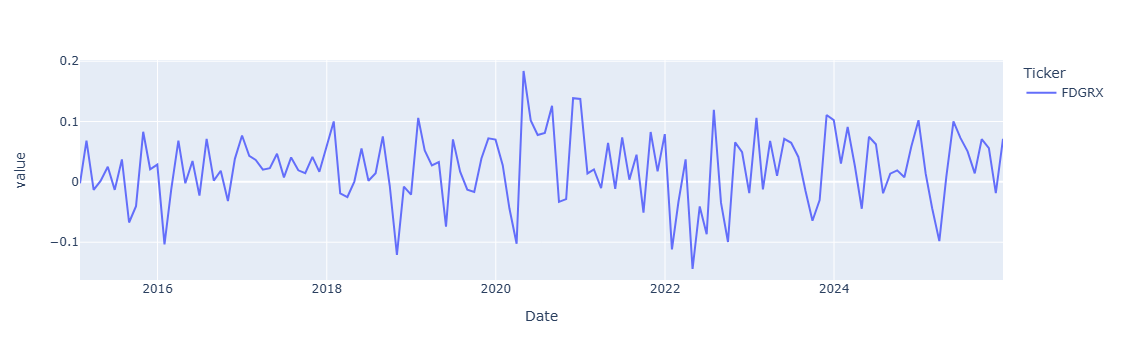

In [10]:
#This gives gain/loss per month, that's why it will come as zig-zag line chart
monthly_cum_returns.plot() 

In [11]:
yearly_cum_returns = np.exp(log_returns.resample('Y').sum()) - 1
yearly_cum_returns

Ticker,FDGRX
Date,
2015-12-31,0.124346
2016-12-31,0.129108
2017-12-31,0.435174
2018-12-31,0.029583
2019-12-31,0.438752
2020-12-31,0.835540
2021-12-31,0.368978
2022-12-31,-0.287507
2023-12-31,0.531324


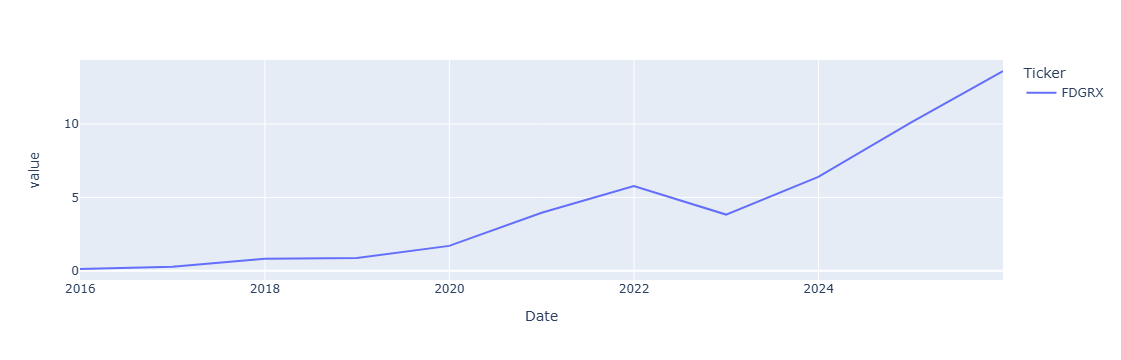

In [12]:
yearly_cum_return_series = (1 + yearly_cum_returns).cumprod() - 1
yearly_cum_return_series.plot()

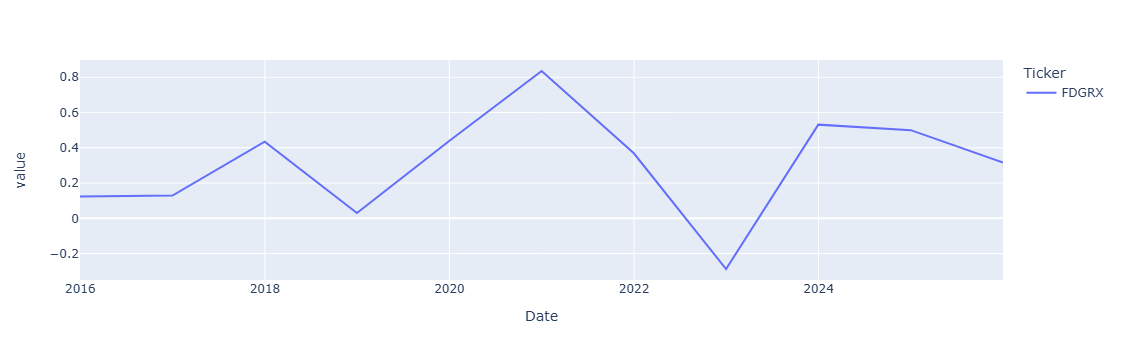

In [13]:
#This gives gain/loss per Year, that's why it will come as zig-zag line chart
yearly_cum_returns.plot()